In [40]:
##IMPORTANDO

#from google.colab import drive
#drive.mount('/content/drive')
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statistics
from scipy.stats import mannwhitneyu
from sklearn.metrics import mean_squared_error, mean_absolute_error
import sklearn as sk
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVR 
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import accuracy_score
from scipy.stats import mannwhitneyu
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from keras.models import Sequential
from keras.layers import LSTM, Dense, GRU, SimpleRNN


# Carregar os dados
df = pd.read_csv("planilhas/dfDias7desloc.csv", sep=';', parse_dates=['Data'], index_col="Data")

# Dividir os dados em conjuntos de treinamento e teste
split = int(0.7 * len(df))
treino = df[:split]
teste = df[split:]

# Preparar dados de treinamento e teste
x_treino = treino.drop(columns='CasosDiasTarget').values
y_treino = treino['CasosDiasTarget'].values

x_teste = teste.drop(columns='CasosDiasTarget').values
y_teste = teste['CasosDiasTarget'].values
y_testeGraf = teste['CasosDiasTarget']



In [41]:
n_steps = 1  # número de passos de tempo
n_features = x_treino.shape[1]  # número de recursos
x_treino = x_treino.reshape((x_treino.shape[0], n_steps, n_features))
x_teste = x_teste.reshape((x_teste.shape[0], n_steps, n_features))

modelos = []
print(n_features) # TA CERTO

4


In [42]:
# Redimensionar os dados para a entrada do LSTM (número de amostras, número de passos de tempo, número de recursos)



# Construir modelo LSTM - 1 CAMADA

rnn1 = Sequential()
rnn1.add(SimpleRNN(50, activation='relu', input_shape=(n_steps, n_features)))
rnn1.add(Dense(1))
rnn1.compile(optimizer='adam', loss='mse')
modelos.append(rnn1)


lstm1 = Sequential()
lstm1.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
lstm1.add(Dense(1))
lstm1.compile(optimizer='adam', loss='mse')
modelos.append(lstm1)

lstm2 = Sequential()
lstm2.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
lstm2.add(LSTM(50, activation='relu'))
lstm2.add(Dense(1))
lstm2.compile(optimizer='adam', loss='mse')
modelos.append(lstm2)

lstm3 = Sequential()
lstm3.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
lstm3.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
lstm3.add(LSTM(50, activation='relu'))
lstm3.add(Dense(1))
lstm3.compile(optimizer='adam', loss='mse')
modelos.append(lstm3)

gru1 = Sequential()
gru1.add(GRU(50, activation='relu', input_shape=(n_steps, n_features)))
gru1.add(Dense(1))
gru1.compile(optimizer='adam', loss='mse')
modelos.append(gru1)

# Modelo 2 com duas camadas GRU
gru2 = Sequential()
gru2.add(GRU(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
gru2.add(GRU(50, activation='relu'))
gru2.add(Dense(1))
gru2.compile(optimizer='adam', loss='mse')
modelos.append(gru2)

# Modelo 3 com três camadas GRU
gru3 = Sequential()
gru3.add(GRU(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
gru3.add(GRU(50, activation='relu', return_sequences=True))
gru3.add(GRU(50, activation='relu'))
gru3.add(Dense(1))
gru3.compile(optimizer='adam', loss='mse')
modelos.append(gru3)

# Modelo 1 camda lstm e 1 camada GRU
lstm1gru1 = Sequential()
lstm1gru1.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
lstm1gru1.add(GRU(50, activation='relu'))
lstm1gru1.add(Dense(1))
lstm1gru1.compile(optimizer='adam', loss='mse')
modelos.append(lstm1gru1)

# Modelo 1 camda lstm e 1 camada GRU 1 camada lstm e 1 camada GRU
lstm1Gru1_2 = Sequential()
lstm1Gru1_2.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
lstm1Gru1_2.add(GRU(50, activation='relu', return_sequences=True))
lstm1Gru1_2.add(LSTM(50, activation='relu', return_sequences=True))
lstm1Gru1_2.add(GRU(50, activation='relu'))
lstm1Gru1_2.add(Dense(1))
lstm1Gru1_2.compile(optimizer='adam', loss='mse')
modelos.append(lstm1Gru1_2)





c:\Users\Bruno\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [43]:
indexModelos = ['RNN1','LSTM1','LSTM2','LSTM3','GRU1','GRU2','GRU3', 'LSTM1GRU1', 'LSTM1GRU1LSTM1GRU1']

dfModelos = pd.DataFrame(modelos, index = indexModelos )
display(dfModelos)

i=0
for m in modelos:
  #print(dfModelos.index[i])
  i+=1
  #print(m)

,0
RNN1,"<Sequential name=sequential_36, built=True>"
LSTM1,"<Sequential name=sequential_37, built=True>"
LSTM2,"<Sequential name=sequential_38, built=True>"
LSTM3,"<Sequential name=sequential_39, built=True>"
GRU1,"<Sequential name=sequential_40, built=True>"
GRU2,"<Sequential name=sequential_41, built=True>"
GRU3,"<Sequential name=sequential_42, built=True>"
LSTM1GRU1,"<Sequential name=sequential_43, built=True>"
LSTM1GRU1LSTM1GRU1,"<Sequential name=sequential_44, built=True>"


# TESTE

In [44]:
predDosmodelos = []
opinioesModelos = []
epocas = [100, 200, 500, 1000]

### RNN1

In [45]:
rangeN = 20
model = rnn1
modelname = "rnn1"

mae = []
mse =[]
rmse = []

maeModelos = []
mseModelos =[]
rmseModelos = []
nomes = []

opinioesModelos = []

epocas = [100, 1000]

melhor_validacao_RNN = float('inf')
modelo = 0
i=0
epocasVetor = []
for j in range(rangeN):
    print(j+1)
    for e in epocas:
        modeloNome = dfModelos.index[i]

        model.fit(x_treino, y_treino, epochs=e, verbose=0)
        # Fazer previsões no conjunto de teste
        opiniaoRNN = model.predict(x_teste)
        mseRnn = mean_squared_error(y_teste, opiniaoRNN).round(2)


        if mseRnn < melhor_validacao_RNN:
            bestParame = e

    
    Bestmodelo = model
    Bestmodelo.fit(x_treino, y_treino, epochs=bestParame, verbose=0)
    opiniaoRNN = Bestmodelo.predict(x_teste)
    predDosmodelos.append(opiniaoRNN)
    epocasVetor.append(bestParame)

    
    maeRnn = mean_absolute_error(y_teste, opiniaoRNN).round(2)
    mseRnn = mean_squared_error(y_teste, opiniaoRNN).round(2)
    rmseRnn = np.sqrt(mseRnn).round(2)



    
    mae.append(maeRnn)
    mse.append(mseRnn)
    rmse.append(rmseRnn)

epocasVetor.append(max(set(epocasVetor), key=epocasVetor.count))
mae.append(np.mean(mae))
mse.append(np.mean(mse))
rmse.append(np.mean(rmse))


dfRNN = pd.DataFrame({
    'EPOCAS': epocasVetor,
    'MAE': mae,
    'MSE': mse,
    'RMSE': rmse
})

stringname = 'resultadosModelos/df' + modelname + '.csv'

print("O ÚLTIMO VALOR (20) É A MÉDIA !!!")
display(dfRNN)
dfRNN.to_csv(stringname, sep = ';', index = False, encoding='UTF-8')



1
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
2
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 333us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 333us/step
3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 333us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
4
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 333us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 333us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step
5
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 333us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 333us/step
6
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 333us/step
7
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 334us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 333us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 333us/step
8
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 333us/step
9


,EPOCAS,MAE,MSE,RMSE
0,1000,12.57,418.1800,20.4500
1,1000,13.92,453.3200,21.2900
2,1000,13.52,469.3300,21.6600
3,1000,14.09,491.1100,22.1600
4,1000,14.95,517.9000,22.7600
5,1000,14.37,496.1300,22.2700
6,1000,14.73,520.5400,22.8200
7,1000,14.82,547.5200,23.4000
8,1000,14.07,501.6600,22.4000
9,1000,14.75,553.5900,23.5300


### LSTM1

In [46]:
rangeN = 20
model = lstm1
modelname = "lstm1"

mae = []
mse =[]
rmse = []

maeModelos = []
mseModelos =[]
rmseModelos = []
nomes = []

opinioesModelos = []

epocas = [100, 1000]

melhor_validacao_RNN = float('inf')
modelo = 0
i=0
epocasVetor = []
for j in range(rangeN):
    print(j+1)
    for e in epocas:
        modeloNome = dfModelos.index[i]

        model.fit(x_treino, y_treino, epochs=e, verbose=0)
        # Fazer previsões no conjunto de teste
        opiniaoRNN = model.predict(x_teste)
        mseRnn = mean_squared_error(y_teste, opiniaoRNN).round(2)


        if mseRnn < melhor_validacao_RNN:
            bestParame = e

    
    Bestmodelo = model
    Bestmodelo.fit(x_treino, y_treino, epochs=bestParame, verbose=0)
    opiniaoRNN = Bestmodelo.predict(x_teste)
    predDosmodelos.append(opiniaoRNN)
    epocasVetor.append(bestParame)

    
    maeRnn = mean_absolute_error(y_teste, opiniaoRNN).round(2)
    mseRnn = mean_squared_error(y_teste, opiniaoRNN).round(2)
    rmseRnn = np.sqrt(mseRnn).round(2)



    
    mae.append(maeRnn)
    mse.append(mseRnn)
    rmse.append(rmseRnn)

epocasVetor.append(max(set(epocasVetor), key=epocasVetor.count))
mae.append(np.mean(mae))
mse.append(np.mean(mse))
rmse.append(np.mean(rmse))


dfRNN = pd.DataFrame({
    'EPOCAS': epocasVetor,
    'MAE': mae,
    'MSE': mse,
    'RMSE': rmse
})

stringname = 'resultadosModelos/df' + modelname + '.csv'

print("O ÚLTIMO VALOR (20) É A MÉDIA !!!")
display(dfRNN)
dfRNN.to_csv(stringname, sep = ';', index = False, encoding='UTF-8')

1
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
2
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 334us/step
4
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 333us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
5
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
6
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 333us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
7
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
8
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step
9


,EPOCAS,MAE,MSE,RMSE
0,1000,16.150,598.6600,24.4700
1,1000,18.540,837.4300,28.9400
2,1000,20.670,1021.7100,31.9600
3,1000,21.510,1043.5200,32.3000
4,1000,21.760,1086.9600,32.9700
5,1000,22.080,1103.2600,33.2200
6,1000,22.670,1224.1000,34.9900
7,1000,23.220,1299.1500,36.0400
8,1000,26.170,1726.8500,41.5600
9,1000,26.370,1981.4700,44.5100


### LSTM2

In [47]:
rangeN = 20
model = lstm2
modelname = "lstm2"

mae = []
mse =[]
rmse = []

maeModelos = []
mseModelos =[]
rmseModelos = []
nomes = []

opinioesModelos = []

epocas = [100, 1000]

melhor_validacao_RNN = float('inf')
modelo = 0
i=0
epocasVetor = []
for j in range(rangeN):
    print(j+1)
    for e in epocas:
        modeloNome = dfModelos.index[i]

        model.fit(x_treino, y_treino, epochs=e, verbose=0)
        # Fazer previsões no conjunto de teste
        opiniaoRNN = model.predict(x_teste)
        mseRnn = mean_squared_error(y_teste, opiniaoRNN).round(2)


        if mseRnn < melhor_validacao_RNN:
            bestParame = e

    
    Bestmodelo = model
    Bestmodelo.fit(x_treino, y_treino, epochs=bestParame, verbose=0)
    opiniaoRNN = Bestmodelo.predict(x_teste)
    predDosmodelos.append(opiniaoRNN)
    epocasVetor.append(bestParame)

    
    maeRnn = mean_absolute_error(y_teste, opiniaoRNN).round(2)
    mseRnn = mean_squared_error(y_teste, opiniaoRNN).round(2)
    rmseRnn = np.sqrt(mseRnn).round(2)



    
    mae.append(maeRnn)
    mse.append(mseRnn)
    rmse.append(rmseRnn)

epocasVetor.append(max(set(epocasVetor), key=epocasVetor.count))
mae.append(np.mean(mae))
mse.append(np.mean(mse))
rmse.append(np.mean(rmse))


dfRNN = pd.DataFrame({
    'EPOCAS': epocasVetor,
    'MAE': mae,
    'MSE': mse,
    'RMSE': rmse
})

stringname = 'resultadosModelos/df' + modelname + '.csv'

print("O ÚLTIMO VALOR (20) É A MÉDIA !!!")
display(dfRNN)
dfRNN.to_csv(stringname, sep = ';', index = False, encoding='UTF-8')

1
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 530us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 499us/step
2
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
4
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
5
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 511us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step
6
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
7
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step
8
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
9

,EPOCAS,MAE,MSE,RMSE
0,1000,16.360,751.70,27.420
1,1000,17.120,1012.79,31.820
2,1000,17.910,977.48,31.260
3,1000,18.420,970.25,31.150
4,1000,17.990,1051.11,32.420
5,1000,18.380,1002.29,31.660
6,1000,21.230,1310.36,36.200
7,1000,17.010,859.51,29.320
8,1000,19.180,1082.64,32.900
9,1000,18.800,1081.22,32.880


### LSTM3

In [48]:
rangeN = 20
model = lstm3
modelname = "lstm3"

mae = []
mse =[]
rmse = []

maeModelos = []
mseModelos =[]
rmseModelos = []
nomes = []

opinioesModelos = []

epocas = [100, 1000]

melhor_validacao_RNN = float('inf')
modelo = 0
i=0
epocasVetor = []
for j in range(rangeN):
    print(j+1)
    for e in epocas:
        modeloNome = dfModelos.index[i]

        model.fit(x_treino, y_treino, epochs=e, verbose=0)
        # Fazer previsões no conjunto de teste
        opiniaoRNN = model.predict(x_teste)
        mseRnn = mean_squared_error(y_teste, opiniaoRNN).round(2)


        if mseRnn < melhor_validacao_RNN:
            bestParame = e

    
    Bestmodelo = model
    Bestmodelo.fit(x_treino, y_treino, epochs=bestParame, verbose=0)
    opiniaoRNN = Bestmodelo.predict(x_teste)
    predDosmodelos.append(opiniaoRNN)
    epocasVetor.append(bestParame)

    
    maeRnn = mean_absolute_error(y_teste, opiniaoRNN).round(2)
    mseRnn = mean_squared_error(y_teste, opiniaoRNN).round(2)
    rmseRnn = np.sqrt(mseRnn).round(2)



    
    mae.append(maeRnn)
    mse.append(mseRnn)
    rmse.append(rmseRnn)

epocasVetor.append(max(set(epocasVetor), key=epocasVetor.count))
mae.append(np.mean(mae))
mse.append(np.mean(mse))
rmse.append(np.mean(rmse))


dfRNN = pd.DataFrame({
    'EPOCAS': epocasVetor,
    'MAE': mae,
    'MSE': mse,
    'RMSE': rmse
})

stringname = 'resultadosModelos/df' + modelname + '.csv'

print("O ÚLTIMO VALOR (20) É A MÉDIA !!!")
display(dfRNN)
dfRNN.to_csv(stringname, sep = ';', index = False, encoding='UTF-8')

1
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step
2
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step
3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step
4
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step
5
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step
6
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step
7
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step
8
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step
9

,EPOCAS,MAE,MSE,RMSE
0,1000,14.8600,646.440,25.430
1,1000,16.4100,785.030,28.020
2,1000,16.7900,856.600,29.270
3,1000,16.7000,836.070,28.910
4,1000,16.6700,949.340,30.810
5,1000,19.1300,1291.400,35.940
6,1000,17.7200,1050.290,32.410
7,1000,16.3000,783.370,27.990
8,1000,17.4800,1261.360,35.520
9,1000,15.2000,860.360,29.330


### GRU1

In [49]:
rangeN = 20
model = gru1
modelname = "gru1"

mae = []
mse =[]
rmse = []

maeModelos = []
mseModelos =[]
rmseModelos = []
nomes = []

opinioesModelos = []

epocas = [100, 1000]

melhor_validacao_RNN = float('inf')
modelo = 0
i=0
epocasVetor = []
for j in range(rangeN):
    print(j+1)
    for e in epocas:
        modeloNome = dfModelos.index[i]

        model.fit(x_treino, y_treino, epochs=e, verbose=0)
        # Fazer previsões no conjunto de teste
        opiniaoRNN = model.predict(x_teste)
        mseRnn = mean_squared_error(y_teste, opiniaoRNN).round(2)


        if mseRnn < melhor_validacao_RNN:
            bestParame = e

    
    Bestmodelo = model
    Bestmodelo.fit(x_treino, y_treino, epochs=bestParame, verbose=0)
    opiniaoRNN = Bestmodelo.predict(x_teste)
    predDosmodelos.append(opiniaoRNN)
    epocasVetor.append(bestParame)

    
    maeRnn = mean_absolute_error(y_teste, opiniaoRNN).round(2)
    mseRnn = mean_squared_error(y_teste, opiniaoRNN).round(2)
    rmseRnn = np.sqrt(mseRnn).round(2)



    
    mae.append(maeRnn)
    mse.append(mseRnn)
    rmse.append(rmseRnn)

epocasVetor.append(max(set(epocasVetor), key=epocasVetor.count))
mae.append(np.mean(mae))
mse.append(np.mean(mse))
rmse.append(np.mean(rmse))


dfRNN = pd.DataFrame({
    'EPOCAS': epocasVetor,
    'MAE': mae,
    'MSE': mse,
    'RMSE': rmse
})

stringname = 'resultadosModelos/df' + modelname + '.csv'

print("O ÚLTIMO VALOR (20) É A MÉDIA !!!")
display(dfRNN)
dfRNN.to_csv(stringname, sep = ';', index = False, encoding='UTF-8')



1
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
2
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 333us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
4
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
5
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 333us/step
6
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 333us/step
7
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
8
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
9


,EPOCAS,MAE,MSE,RMSE
0,1000,14.1500,505.4600,22.480
1,1000,16.0800,621.9000,24.940
2,1000,17.1000,660.0300,25.690
3,1000,19.7700,837.6700,28.940
4,1000,19.4600,819.7400,28.630
5,1000,21.9300,977.2300,31.260
6,1000,20.7100,943.1000,30.710
7,1000,21.4500,1030.3500,32.100
8,1000,21.2500,1051.4100,32.430
9,1000,24.1400,1203.4700,34.690


### GRU2

In [50]:
rangeN = 20
model = gru2
modelname = "gru2"

mae = []
mse =[]
rmse = []

maeModelos = []
mseModelos =[]
rmseModelos = []
nomes = []

opinioesModelos = []

epocas = [100, 1000]

melhor_validacao_RNN = float('inf')
modelo = 0
i=0
epocasVetor = []
for j in range(rangeN):
    print(j+1)
    for e in epocas:
        modeloNome = dfModelos.index[i]

        model.fit(x_treino, y_treino, epochs=e, verbose=0)
        # Fazer previsões no conjunto de teste
        opiniaoRNN = model.predict(x_teste)
        mseRnn = mean_squared_error(y_teste, opiniaoRNN).round(2)


        if mseRnn < melhor_validacao_RNN:
            bestParame = e

    
    Bestmodelo = model
    Bestmodelo.fit(x_treino, y_treino, epochs=bestParame, verbose=0)
    opiniaoRNN = Bestmodelo.predict(x_teste)
    predDosmodelos.append(opiniaoRNN)
    epocasVetor.append(bestParame)

    
    maeRnn = mean_absolute_error(y_teste, opiniaoRNN).round(2)
    mseRnn = mean_squared_error(y_teste, opiniaoRNN).round(2)
    rmseRnn = np.sqrt(mseRnn).round(2)



    
    mae.append(maeRnn)
    mse.append(mseRnn)
    rmse.append(rmseRnn)

epocasVetor.append(max(set(epocasVetor), key=epocasVetor.count))
mae.append(np.mean(mae))
mse.append(np.mean(mse))
rmse.append(np.mean(rmse))


dfRNN = pd.DataFrame({
    'EPOCAS': epocasVetor,
    'MAE': mae,
    'MSE': mse,
    'RMSE': rmse
})

stringname = 'resultadosModelos/df' + modelname + '.csv'

print("O ÚLTIMO VALOR (20) É A MÉDIA !!!")
display(dfRNN)
dfRNN.to_csv(stringname, sep = ';', index = False, encoding='UTF-8')



1
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step
2
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 522us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step
3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step
4
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
5
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step
6
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step
7
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
8
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step
9

,EPOCAS,MAE,MSE,RMSE
0,1000,17.7100,796.0100,28.2100
1,1000,20.4500,1170.9400,34.2200
2,1000,23.9000,1488.4200,38.5800
3,1000,22.2100,1445.0200,38.0100
4,1000,25.2200,1894.6600,43.5300
5,1000,27.7600,2155.0300,46.4200
6,1000,27.6100,2328.9800,48.2600
7,1000,23.6900,1559.6800,39.4900
8,1000,24.2500,1982.5200,44.5300
9,1000,25.4500,1897.7500,43.5600


### GRU3

In [51]:
rangeN = 20
model = gru3
modelname = "gru3"

mae = []
mse =[]
rmse = []

maeModelos = []
mseModelos =[]
rmseModelos = []
nomes = []

opinioesModelos = []

epocas = [100, 1000]

melhor_validacao_RNN = float('inf')
modelo = 0
i=0
epocasVetor = []
for j in range(rangeN):
    print(j+1)
    for e in epocas:
        modeloNome = dfModelos.index[i]

        model.fit(x_treino, y_treino, epochs=e, verbose=0)
        # Fazer previsões no conjunto de teste
        opiniaoRNN = model.predict(x_teste)
        mseRnn = mean_squared_error(y_teste, opiniaoRNN).round(2)


        if mseRnn < melhor_validacao_RNN:
            bestParame = e

    
    Bestmodelo = model
    Bestmodelo.fit(x_treino, y_treino, epochs=bestParame, verbose=0)
    opiniaoRNN = Bestmodelo.predict(x_teste)
    predDosmodelos.append(opiniaoRNN)
    epocasVetor.append(bestParame)

    
    maeRnn = mean_absolute_error(y_teste, opiniaoRNN).round(2)
    mseRnn = mean_squared_error(y_teste, opiniaoRNN).round(2)
    rmseRnn = np.sqrt(mseRnn).round(2)



    
    mae.append(maeRnn)
    mse.append(mseRnn)
    rmse.append(rmseRnn)

epocasVetor.append(max(set(epocasVetor), key=epocasVetor.count))
mae.append(np.mean(mae))
mse.append(np.mean(mse))
rmse.append(np.mean(rmse))


dfRNN = pd.DataFrame({
    'EPOCAS': epocasVetor,
    'MAE': mae,
    'MSE': mse,
    'RMSE': rmse
})

stringname = 'resultadosModelos/df' + modelname + '.csv'

print("O ÚLTIMO VALOR (20) É A MÉDIA !!!")
display(dfRNN)
dfRNN.to_csv(stringname, sep = ';', index = False, encoding='UTF-8')



1
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step
2
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 596us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 538us/step
3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 584us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step
4
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 582us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step
5
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 584us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 505us/step
6
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step
7
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
8
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 542us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step
9

,EPOCAS,MAE,MSE,RMSE
0,1000,14.2800,568.7500,23.8500
1,1000,16.0600,872.6700,29.5400
2,1000,15.5500,707.0400,26.5900
3,1000,14.3700,772.3300,27.7900
4,1000,16.8600,905.6700,30.0900
5,1000,18.2900,971.2500,31.1600
6,1000,17.4600,1138.2700,33.7400
7,1000,19.4000,1147.6700,33.8800
8,1000,20.6300,1942.7600,44.0800
9,1000,19.2400,1637.6400,40.4700


### LSTM1GRU1

In [52]:
rangeN = 20
model = lstm1gru1
modelname = "lstm1gru1"

mae = []
mse =[]
rmse = []

maeModelos = []
mseModelos =[]
rmseModelos = []
nomes = []

opinioesModelos = []

epocas = [100, 1000]

melhor_validacao_RNN = float('inf')
modelo = 0
i=0
epocasVetor = []
for j in range(rangeN):
    print(j+1)
    for e in epocas:
        modeloNome = dfModelos.index[i]

        model.fit(x_treino, y_treino, epochs=e, verbose=0)
        # Fazer previsões no conjunto de teste
        opiniaoRNN = model.predict(x_teste)
        mseRnn = mean_squared_error(y_teste, opiniaoRNN).round(2)


        if mseRnn < melhor_validacao_RNN:
            bestParame = e

    
    Bestmodelo = model
    Bestmodelo.fit(x_treino, y_treino, epochs=bestParame, verbose=0)
    opiniaoRNN = Bestmodelo.predict(x_teste)
    predDosmodelos.append(opiniaoRNN)
    epocasVetor.append(bestParame)

    
    maeRnn = mean_absolute_error(y_teste, opiniaoRNN).round(2)
    mseRnn = mean_squared_error(y_teste, opiniaoRNN).round(2)
    rmseRnn = np.sqrt(mseRnn).round(2)



    
    mae.append(maeRnn)
    mse.append(mseRnn)
    rmse.append(rmseRnn)

epocasVetor.append(max(set(epocasVetor), key=epocasVetor.count))
mae.append(np.mean(mae))
mse.append(np.mean(mse))
rmse.append(np.mean(rmse))


dfRNN = pd.DataFrame({
    'EPOCAS': epocasVetor,
    'MAE': mae,
    'MSE': mse,
    'RMSE': rmse
})

stringname = 'resultadosModelos/df' + modelname + '.csv'

print("O ÚLTIMO VALOR (20) É A MÉDIA !!!")
display(dfRNN)
dfRNN.to_csv(stringname, sep = ';', index = False, encoding='UTF-8')



1
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 513us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
2
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step
3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step
4
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
5
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
6
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step
7
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step
8
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 507us/step
9

,EPOCAS,MAE,MSE,RMSE
0,1000,15.790,724.2500,26.9100
1,1000,16.560,763.9600,27.6400
2,1000,20.200,1225.2600,35.0000
3,1000,18.920,1106.0500,33.2600
4,1000,19.170,1259.2000,35.4900
5,1000,20.270,1593.5800,39.9200
6,1000,21.630,1687.2200,41.0800
7,1000,20.770,1436.8800,37.9100
8,1000,22.810,1871.7400,43.2600
9,1000,21.260,1607.4700,40.0900


### LSTM1GRU1 + LSTM1GRU1

In [53]:
rangeN = 20
model = lstm1Gru1_2
modelname = "lstm1Gru1_2"

mae = []
mse =[]
rmse = []

maeModelos = []
mseModelos =[]
rmseModelos = []
nomes = []

opinioesModelos = []

epocas = [100, 1000]

melhor_validacao_RNN = float('inf')
modelo = 0
i=0
epocasVetor = []
for j in range(rangeN):
    print(j+1)
    for e in epocas:
        modeloNome = dfModelos.index[i]

        model.fit(x_treino, y_treino, epochs=e, verbose=0)
        # Fazer previsões no conjunto de teste
        opiniaoRNN = model.predict(x_teste)
        mseRnn = mean_squared_error(y_teste, opiniaoRNN).round(2)


        if mseRnn < melhor_validacao_RNN:
            bestParame = e

    
    Bestmodelo = model
    Bestmodelo.fit(x_treino, y_treino, epochs=bestParame, verbose=0)
    opiniaoRNN = Bestmodelo.predict(x_teste)
    predDosmodelos.append(opiniaoRNN)
    epocasVetor.append(bestParame)

    
    maeRnn = mean_absolute_error(y_teste, opiniaoRNN).round(2)
    mseRnn = mean_squared_error(y_teste, opiniaoRNN).round(2)
    rmseRnn = np.sqrt(mseRnn).round(2)



    
    mae.append(maeRnn)
    mse.append(mseRnn)
    rmse.append(rmseRnn)

epocasVetor.append(max(set(epocasVetor), key=epocasVetor.count))
mae.append(np.mean(mae))
mse.append(np.mean(mse))
rmse.append(np.mean(rmse))


dfRNN = pd.DataFrame({
    'EPOCAS': epocasVetor,
    'MAE': mae,
    'MSE': mse,
    'RMSE': rmse
})

stringname = 'resultadosModelos/df' + modelname + '.csv'

print("O ÚLTIMO VALOR (20) É A MÉDIA !!!")
display(dfRNN)
dfRNN.to_csv(stringname, sep = ';', index = False, encoding='UTF-8')



1
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step
2
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step
3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step
4
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 534us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 584us/step
5
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 917us/step
6
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
7
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
8
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 917us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
9
13/

,EPOCAS,MAE,MSE,RMSE
0,1000,13.7700,578.4100,24.050
1,1000,14.0600,547.8300,23.410
2,1000,16.0500,651.2300,25.520
3,1000,13.9800,634.3800,25.190
4,1000,16.0800,808.1700,28.430
5,1000,16.4600,707.2600,26.590
6,1000,14.2700,836.0300,28.910
7,1000,15.5600,809.5400,28.450
8,1000,14.8200,738.4700,27.170
9,1000,16.0200,845.0100,29.070


In [54]:
import joblib


joblib.dump(predDosmodelos, 'predsSalva/rnn.pkl')


['predsSalva/rnn.pkl']

# CHECKPOINT

In [55]:
import joblib

predDosmodelos = joblib.load('predsSalva/rnn.pkl')

In [56]:

opiniaoModelo = 0
validaModelo = float('inf')

for i in range(len(indexModelos)):
  opiniaoModelo = mean_squared_error(y_teste, predDosmodelos[i]).round(2)
  print(opiniaoModelo)
  if opiniaoModelo < validaModelo:
    validaModelo = opiniaoModelo
    nomeModelo = indexModelos[i]
    melhorModelo = predDosmodelos[i]

print('\n')
print(nomeModelo)
#print(validaModelo)


#print(melhorModelo)
print(len(melhorModelo))




418.18
453.32
469.33
491.11
517.9
496.13
520.54
547.52
501.66


RNN1
415


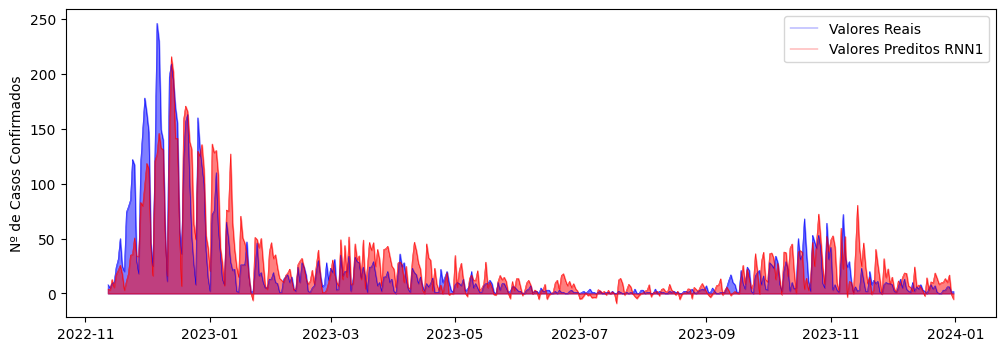

Numero de casos reais:  8737
Numero de casos predito:  10129


In [57]:
serie = pd.Series(np.array(melhorModelo).flatten(), index = y_testeGraf.index)

stringGraf = 'graficos/4-'+ 'rnn' + nomeModelo + '.pdf'
plt.figure(figsize=(12, 4))
plt.plot(y_testeGraf, label='Valores Reais', color='blue', linewidth=0.3)
plt.plot(serie, label=('Valores Preditos ' + nomeModelo), color='red', linewidth=0.3)#plt.fill_between(x_teste.index, y_teste, color='blue', alpha=0.5)
plt.fill_between(y_testeGraf.index, y_testeGraf, color='blue', alpha=0.5)
plt.fill_between(serie.index, serie, color='red', alpha=0.5)  # Pinta a área entre as linhas
plt.ylabel('Nº de Casos Confirmados')
plt.legend()
plt.savefig(stringGraf, dpi=300, bbox_inches="tight")
plt.show()

n_pred = int(serie.sum())
print('Numero de casos reais: ', y_teste.sum())
print('Numero de casos predito: ', n_pred)


0
1
2
3
4
5
6
7
8


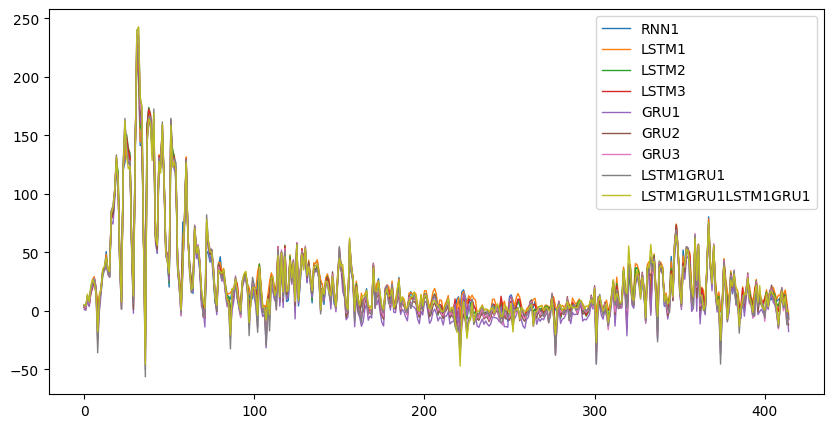

In [58]:




plt.figure(figsize=(10, 5))



for i in (range(len(indexModelos))):
  print(i)
  plt.plot(predDosmodelos[i], label=indexModelos[i], linewidth=1)
plt.legend()
plt.savefig('graficos/4-RNN.pdf', dpi=300, bbox_inches = "tight")
plt.show()

